### Anaylzing the consumption of Fossil Fuels (DMC tonnes)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [13]:
#Read the Energy use csv file into a DataFrame:
df=pd.read_csv("C:\\Users\\ibsi\\Desktop\\Final project\\Data-analysis\\Datasets\\Fossil fuels DMC tonnes.csv")
#df=df.rename(columns={"Country Name": "Country"})
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
1,Africa,103149904.0,105186617.0,106639492.0,113261704.0,118731114.0,125567553.0,130421852.0,141666136.0,149524658.0,...,472242859.0,471972065.0,470321465.0,476297346.0,468558623.0,467557855.0,492757760.0,479833553.0,486847427.0,496183862.0
2,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
3,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
4,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0


In [14]:
# We need to drop the regions (reffered to as Invalid in the below list) from the original dataset. 

General_terms = [
"Africa", 
"Asia + Pacific", 
"EECCA",
"Ethiopia (Former)",
"Europe",
"Latin America + Caribbean",
"North America",
"Serbia (and Montenegro)",
"Sudan (Former)",
"USSR",
"West Asia",
"Yugoslavia SFR"]

for c in General_terms:
    df=df.drop(df.index[df["Country"]==c].to_list(), axis=0)
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
2,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
3,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
4,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = df.reset_index(drop=True)
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
1,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
2,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
3,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# We are interested in the data from the last 8 years only for calculations:

df=df[["Country","2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

In [17]:
df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,82900.0,102500.0,221178.0,204975.0,117575.0,153799.0,155097.0,356080.0,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
1,Albania,1147542.0,1222886.0,1341792.0,1361036.0,1496930.0,1516542.0,1370542.0,1356060.0,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
2,Algeria,23617352.0,23308482.0,26166873.0,27633408.0,27698697.0,28594858.0,30864098.0,32232009.0,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
3,Angola,389880.0,2567520.0,2491400.0,3361600.0,3411000.0,2635600.0,3817120.0,3872720.0,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Scatter plot for Fossil fuels:

China=df.loc[df["Country"] == "China"]
USA=df.loc[df["Country"] == "United States of America"]
India=df.loc[df["Country"] == "India"] 

frames = [China, USA, India]
result = pd.concat(frames)
del result["Country"]
df = pd.DataFrame(data=result)
df=df.reset_index(drop=True)
df_transposed = df.T
df_transposed = df_transposed.rename(columns={0: "China", 1: "USA", 2: "India"})
df_transposed

,China,USA,India
2000,1.488833e+09,2.251277e+09,4.823570e+08
2001,1.545804e+09,2.346886e+09,4.973837e+08
2002,1.663290e+09,2.287654e+09,5.210605e+08
2003,1.947813e+09,2.297731e+09,5.462571e+08
2004,2.272333e+09,2.361503e+09,5.819548e+08
2005,2.523370e+09,2.373646e+09,6.207353e+08
2006,2.761923e+09,2.401984e+09,6.628730e+08
2007,2.996008e+09,2.379989e+09,7.069275e+08
2008,3.148828e+09,2.333258e+09,7.623127e+08
2009,3.472604e+09,2.204470e+09,8.569191e+08


Metal Ores Consumption for the same period

In [20]:
#Read the Energy use csv file into a DataFrame:
df1=pd.read_csv("C:\\Users\\ibsi\\Desktop\\Final project\\Data-analysis\\Datasets\\Metal Ores DMC tonnes.csv")

# We need to drop the regions (reffered to as Invalid in the below list) from the original dataset. 

General_terms = [
"Africa", 
"Asia + Pacific", 
"EECCA",
"Ethiopia (Former)",
"Europe",
"Latin America + Caribbean",
"North America",
"Serbia (and Montenegro)",
"Sudan (Former)",
"USSR",
"West Asia",
"Yugoslavia SFR"]

for c in General_terms:
    df1=df1.drop(df1.index[df1["Country"]==c].to_list(), axis=0)
df1=df1.reset_index(drop=True)
df1=df1[["Country","2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

#Create a DataFrame for the countries we are interested in:

China=df1.loc[df1["Country"] == "China"]
USA=df1.loc[df1["Country"] == "United States of America"]
India=df1.loc[df1["Country"] == "India"] 

frames2 = [China, USA, India]
result2 = pd.concat(frames2)
del result2["Country"]
df1 = pd.DataFrame(data=result2)
df1=df1.reset_index(drop=True)
df1_transposed = df1.T
df1_transposed = df1_transposed.rename(columns={0: "China", 1: "USA", 2: "India"})
df1_transposed

,China,USA,India
2000,4.761854e+08,844409654.0,76603995.0
2001,5.147276e+08,770419815.0,86316324.0
2002,5.642384e+08,694055563.0,70367928.0
2003,6.633372e+08,655449855.0,100190701.0
2004,7.961050e+08,663282526.0,117349923.0
2005,9.666502e+08,648734555.0,95910493.0
2006,1.179963e+09,672860882.0,132000232.0
2007,1.389538e+09,633027657.0,176151300.0
2008,1.610921e+09,651087702.0,185557375.0
2009,1.938059e+09,558586446.0,164604089.0


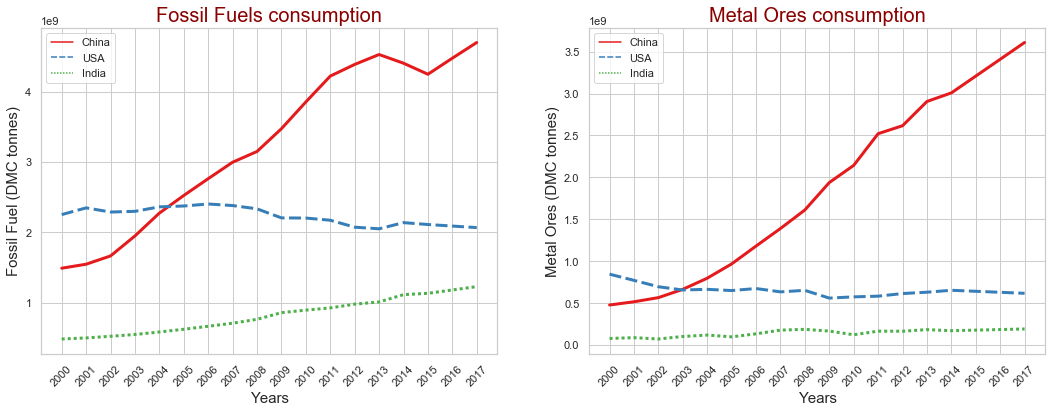

In [72]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(18,6));
#plt.xticks(rotation=45);
Fossils=sns.lineplot(data=df_transposed, palette="Set1", linewidth=3, ax=ax[0]);
ax[0].set_title("Fossil Fuels consumption", size = 20, color="DarkRed");
Fossils.set_xlabel("Years", size= 15);
Fossils.set_ylabel("Fossil Fuel (DMC tonnes)", size= 15);
plt.setp(ax[0].get_xticklabels(), rotation=45)


Ores=sns.lineplot(data=df1_transposed, palette="Set1", linewidth=3, ax=ax[1]);
ax[1].set_title("Metal Ores consumption", size = 20, color="DarkRed");
Ores.set_xlabel("Years", size= 15);
Ores.set_ylabel("Metal Ores (DMC tonnes)", size= 15);

plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_4", transparent=True, bbox_inches="tight")